In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [4]:
graph_df = df.sample(n = 20000, random_state=34)

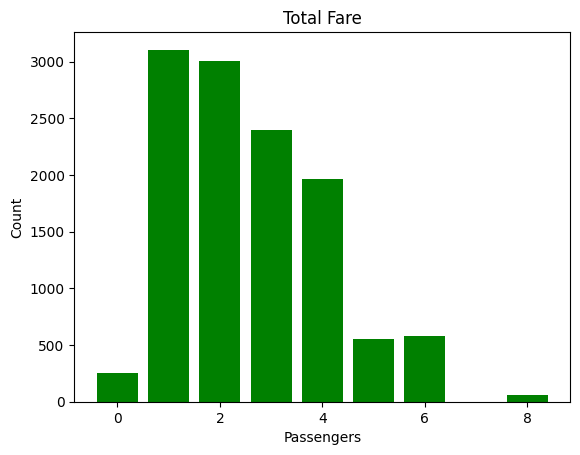

In [5]:
plt.bar(x=graph_df['num_of_passengers'], height=graph_df["total_fare"], color="green")
plt.xlabel("Passengers")
plt.ylabel("Count")
plt.title("Total Fare")
plt.show()

<Axes: xlabel='trip_duration', ylabel='Count'>

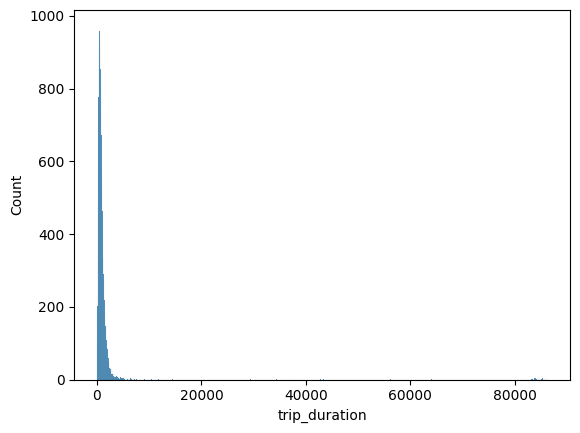

In [6]:
sns.histplot(graph_df['trip_duration'])

<Axes: xlabel='distance_traveled', ylabel='Count'>

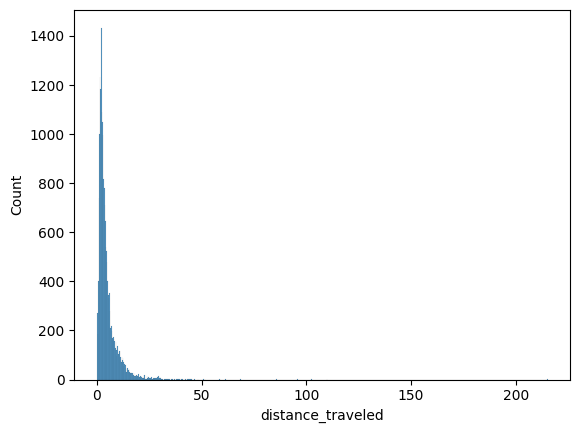

In [7]:
sns.histplot(graph_df['distance_traveled'])

In [8]:
X = df.drop('total_fare', axis=1)

In [9]:
y = df['total_fare']

In [10]:
scaler = StandardScaler()

In [11]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
x_train_scaled= scaler.fit_transform(x_train)

In [13]:
x_train_scaled

array([[-0.14841821, -0.453583  , -0.31383168, ..., -0.64870227,
        -0.12870678, -0.6246858 ],
       [-0.03301021, -0.22444258, -0.31383168, ...,  0.59816233,
        -0.7346221 , -0.6246858 ],
       [-0.17763542, -0.47752304, -0.31383168, ..., -0.14995643,
        -0.71070439, -0.6246858 ],
       ...,
       [-0.07746211, -0.16630248, -0.31383168, ...,  0.24904024,
        -0.75056724, -0.6246858 ],
       [-0.13026179, -0.57328322,  2.91025065, ..., -0.64870227,
        -0.72664953, -0.6246858 ],
       [-0.17951367, -0.67930341, -0.31383168, ..., -0.05020726,
        -0.45757529, -0.6246858 ]])

In [14]:
x_test_scaled = scaler.transform(x_test)

In [15]:
lr = LinearRegression()
en = ElasticNet()
rid = Ridge()
ls = Lasso()
svr = SVR()
rfr = RandomForestRegressor()

In [16]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


1.0 3.143853257942601e-14 5.237442686371007e-25


In [17]:
print(r2_score(y_test, y_pred))

1.0


In [18]:
en.fit(x_train, y_train)
y_pred = en.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


0.9999992472207987 0.06522067035485093 0.007414245897119558


In [19]:
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


0.9999999999999798 4.996305752312341e-07 1.9934642859157806e-10


In [20]:
ls.fit(x_train, y_train)
y_pred = ls.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


0.9999992446493788 0.06537159273770066 0.007439572233800218


In [21]:
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


0.9933840598938743 0.3519462576707118 65.16147988987238


In [23]:
lrpoly = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
lrpoly.fit(x_train_poly, y_train)
y_pred = lrpoly.predict(x_test_poly)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred))


1.0 4.970049666899003e-12 7.902470967357347e-19


## Important Graphs

<Axes: xlabel='trip_duration', ylabel='total_fare'>

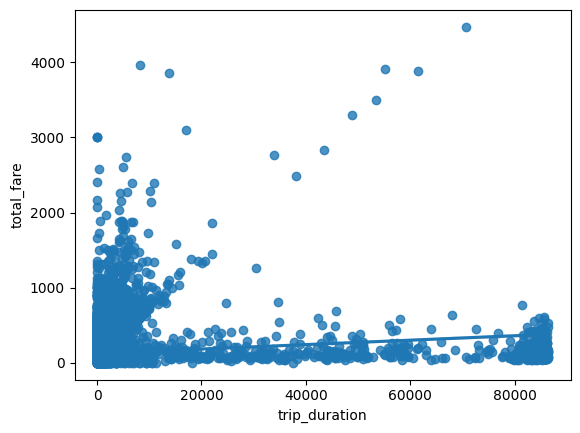

In [25]:
sns.regplot(x= df['trip_duration'], y =y)

<Axes: xlabel='trip_duration', ylabel='total_fare'>

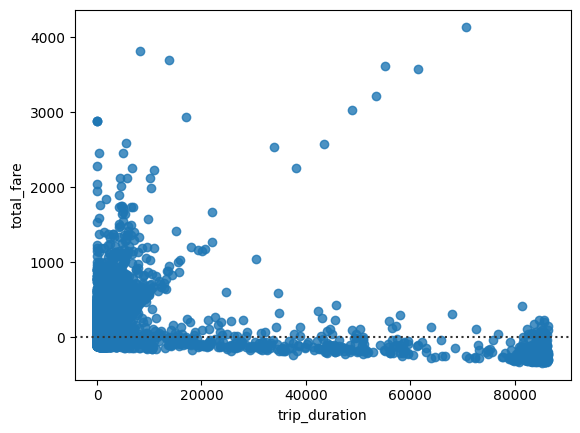

In [26]:
sns.residplot(x= df['trip_duration'], y =y)

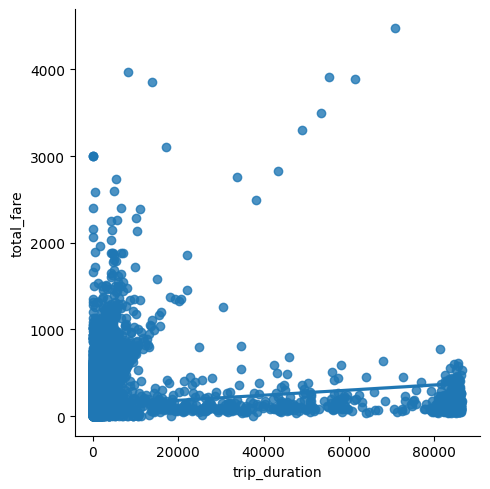

In [27]:
sns.lmplot(x ='trip_duration', y ='total_fare', data = df) 

In [30]:
df['surge_applied'].unique().sum()

1

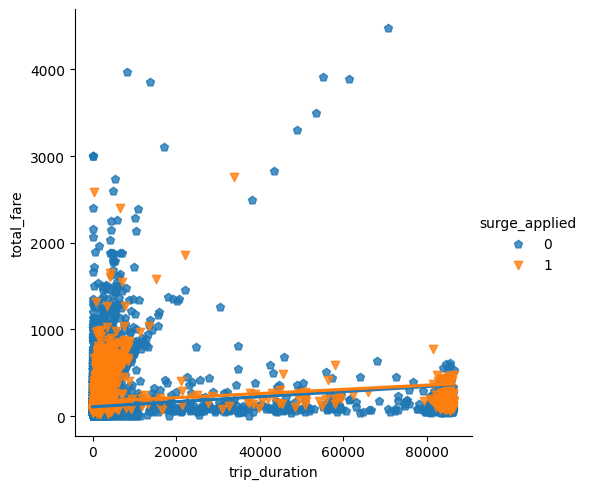

In [33]:
sns.lmplot(x ='trip_duration', y ='total_fare', hue='surge_applied',markers =['p', 'v'], data = df) 

In [34]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


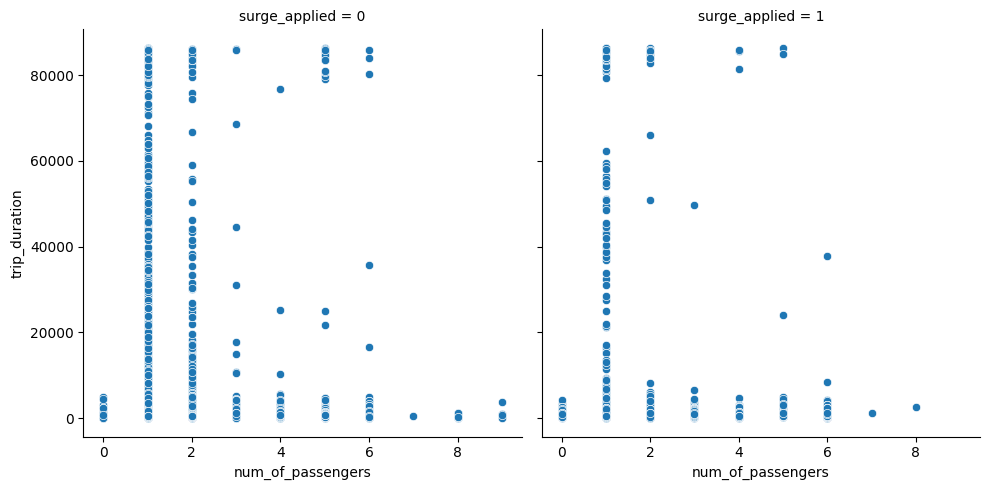

In [37]:
sns.relplot(data=df, x="num_of_passengers", y="trip_duration", col="surge_applied")

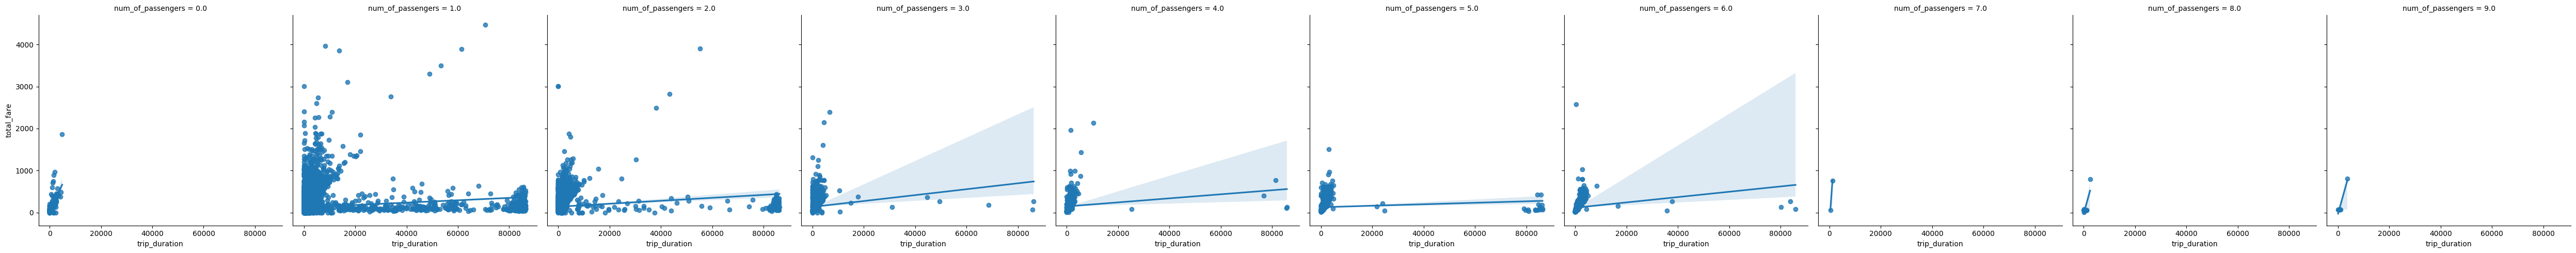

In [42]:
sns.lmplot(x ='trip_duration', y ='total_fare', col='num_of_passengers', data = df) 

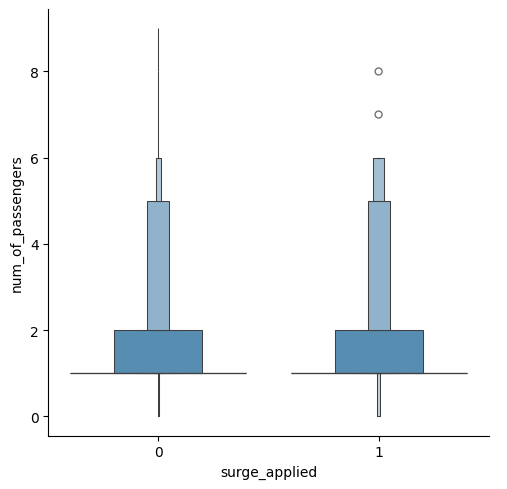

In [56]:
sns.catplot(data=df, x="surge_applied", y="num_of_passengers", kind='boxen')

<Axes: xlabel='num_of_passengers', ylabel='total_fare'>

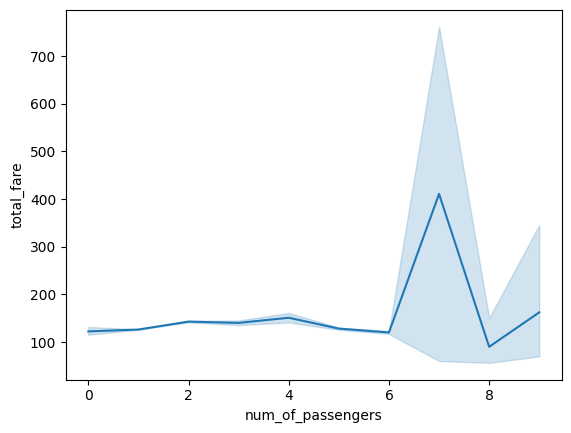

In [57]:
sns.lineplot(data = df, x = 'num_of_passengers', y= 'total_fare')

<Axes: xlabel='num_of_passengers', ylabel='count'>

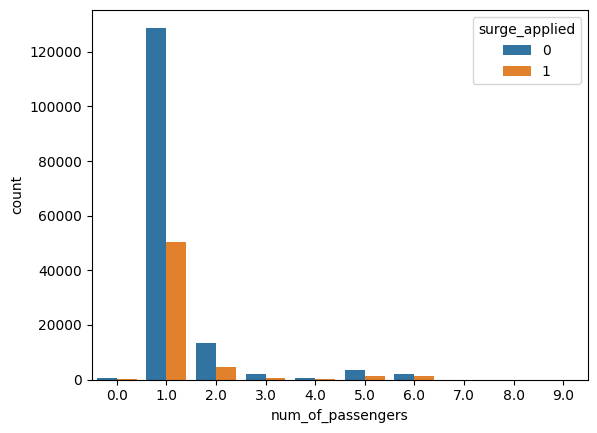

In [58]:
sns.countplot(data = df, x = 'num_of_passengers', hue='surge_applied')

## Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [60]:
rfr_param_grid={
        'n_estimators': [50, 100],
        'max_depth': [None,10,30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

In [63]:
rfr_grid = GridSearchCV(
    estimator=rfr,
    param_grid=rfr_param_grid,
    cv = 5,
    n_jobs=-1
)

In [83]:
rfr_grid.fit(x_train, y_train)
y_pred = rfr_grid.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred),mean_squared_log_error(y_test, y_pred))

print(pearsonr(y_test, y_pred), spearmanr(y_test, y_pred), kendalltau(y_test, y_pred))


0.9930829079142336 0.35737970970719074 68.12757516135021 0.00024915068345588624


In [65]:
ridge_lasso_param_grid = {
    'alpha' : [0.001, 0.01, 1, 10]
}

In [67]:
rid_grid = GridSearchCV(
    estimator=rid,
    param_grid=ridge_lasso_param_grid,
    cv = 5,
    n_jobs=-1
)

In [85]:
rid_grid.fit(x_train, y_train)
y_pred = rid_grid.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred),mean_squared_log_error(y_test, y_pred))

print(pearsonr(y_test, y_pred), spearmanr(y_test, y_pred), kendalltau(y_test, y_pred))


1.0 5.005949186624784e-10 2.024506307534055e-16 4.35511348986419e-21
PearsonRResult(statistic=1.0, pvalue=0.0) SignificanceResult(statistic=0.9999516591347944, pvalue=0.0) SignificanceResult(statistic=0.9966007003485229, pvalue=0.0)


In [69]:
ls_grid = GridSearchCV(
    estimator=ls,
    param_grid=ridge_lasso_param_grid,
    cv = 5,
    n_jobs=-1
)

In [86]:
ls_grid.fit(x_train, y_train)
y_pred = ls_grid.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred),mean_squared_log_error(y_test, y_pred))

print(pearsonr(y_test, y_pred), spearmanr(y_test, y_pred), kendalltau(y_test, y_pred))


0.999999999999224 6.569069550386324e-05 7.643440814937346e-09 8.437517326665448e-12
PearsonRResult(statistic=0.9999999999997944, pvalue=0.0) SignificanceResult(statistic=0.9999516593682073, pvalue=0.0) SignificanceResult(statistic=0.9966026313064654, pvalue=0.0)


In [72]:
svr_grid = {
    'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2]
    }

In [74]:
elastic_params = {
    'alpha' : [0.001,0.01,0.1,0.5],
    'l1_ratio' : [0.001,0.002,0.3]
}

In [75]:
elas_grid = GridSearchCV(
    estimator=en,
    param_grid=elastic_params,
    cv = 5,
    n_jobs=-1
)

In [87]:
elas_grid.fit(x_train, y_train)
y_pred = elas_grid.predict(x_test)

print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred),mean_squared_log_error(y_test, y_pred))

print(pearsonr(y_test, y_pred), spearmanr(y_test, y_pred), kendalltau(y_test, y_pred))


0.999999999253668 9.058786358219132e-05 7.3507466795321995e-06 1.52970515990113e-10
PearsonRResult(statistic=0.9999999996268489, pvalue=0.0) SignificanceResult(statistic=0.999951658748304, pvalue=0.0) SignificanceResult(statistic=0.9965967675839909, pvalue=0.0)
